In [7]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/dataset_citra_tebu/dtm1k')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

## Load Dataset

In [9]:
train_dir = '/content/drive/My Drive/dataset_citra_tebu/dtm1k/train'
test_dir = '/content/drive/My Drive/dataset_citra_tebu/dtm1k/test'

# Preprocessing dan augmentasi data untuk training dan validation
train_datagen = ImageDataGenerator(
    rescale=1./255,               # Normalisasi gambar
    rotation_range=30,            # Rotasi acak antara 0–30 derajat
    zoom_range=0.2,               # Zoom acak antara 0–20%
    horizontal_flip=True,         # Membalikkan gambar secara horizontal
    validation_split=0.2          # 20% data training digunakan untuk validasi
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Normalisasi data test

# Load data training dan validasi
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),       # Ukuran gambar input (224x224)
    batch_size=32,                # Ukuran batch
    class_mode='categorical',     # Multi-class classification
    subset='training'             # Data training
)

val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'           # Data validasi
)

# Load data testing
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False                  # Jangan shuffle data test
)


Found 315 images belonging to 4 classes.
Found 77 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentasi hanya untuk data training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% buat validasi
)

# Untuk validasi: tanpa augmentasi, hanya rescale
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Path folder data
data_dir = '/content/drive/My Drive/dataset_citra_tebu/dtm1k/train'  # sesuaikan jika berbeda

# Data training
train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Data validasi
val_data = val_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 315 images belonging to 4 classes.
Found 77 images belonging to 4 classes.


## Bangun Model CNN

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    Dropout(0.2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 kelas
])


In [19]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


### Train Model dgn epoch 5,10,20,30

In [20]:
history_aug = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data,
    verbose=1
)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 81s 8s/step - accuracy: 0.3779 - loss: 4.4757 - val_accuracy: 0.5584 - val_loss: 1.2094
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 74s 7s/step - accuracy: 0.5284 - loss: 1.2065 - val_accuracy: 0.5584 - val_loss: 1.1368
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 81s 7s/step - accuracy: 0.5442 - loss: 1.2443 - val_accuracy: 0.5584 - val_loss: 1.1787
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 82s 8s/step - accuracy: 0.5649 - loss: 1.1899 - val_accuracy: 0.5584 - val_loss: 1.2327
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 73s 7s/step - accuracy: 0.5591 - loss: 1.1545 - val_accuracy: 0.5584 - val_loss: 1.1673
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 73s 7s/step - accuracy: 0.5823 - loss: 1.0875 - val_accuracy: 0.5584 - val_loss: 1.2003
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 73s 7s/step - accuracy: 0.5472 - loss: 1.1476 - val_accuracy: 0.5584 - val_loss: 1.1874
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 75s 7s/step - accuracy: 0.5934 - loss: 1.0421 - val_accuracy: 0.5584 - val_loss:

In [24]:
epoch_list = [5,10]
histories = {}

for ep in epoch_list:
    print(f"\nTraining dengan {ep} epoch...\n")

    history_aug = model.fit(
        train_data,
        epochs=ep,
        validation_data=val_data,
        verbose=1
    )

    histories[f'{ep}_epoch'] = history_aug



Training dengan 5 epoch...

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 79s 8s/step - accuracy: 0.5801 - loss: 1.0701 - val_accuracy: 0.5584 - val_loss: 1.2712
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 73s 7s/step - accuracy: 0.5552 - loss: 1.0986 - val_accuracy: 0.5584 - val_loss: 1.1139
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 74s 7s/step - accuracy: 0.5014 - loss: 1.0982 - val_accuracy: 0.5584 - val_loss: 1.2242
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 70s 7s/step - accuracy: 0.5210 - loss: 1.1103 - val_accuracy: 0.5584 - val_loss: 1.1402
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 73s 7s/step - accuracy: 0.5736 - loss: 0.9745 - val_accuracy: 0.5584 - val_loss: 1.1774

Training dengan 10 epoch...

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 76s 8s/step - accuracy: 0.5857 - loss: 0.9640 - val_accuracy: 0.4805 - val_loss: 1.1309
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 73s 7s/step - accuracy: 0.5923 - loss: 0.9784 - val_accuracy: 0.6364 - val_loss: 1.0008
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 82s 7s/step - accuracy: 0.

In [25]:
val_loss, val_acc = model.evaluate(val_data)
print(f"\nAkurasi Validasi: {val_acc:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7101 - loss: 0.7000

Akurasi Validasi: 0.6234


In [26]:
model.save("cnn_daun_tebu_augmented.h5")


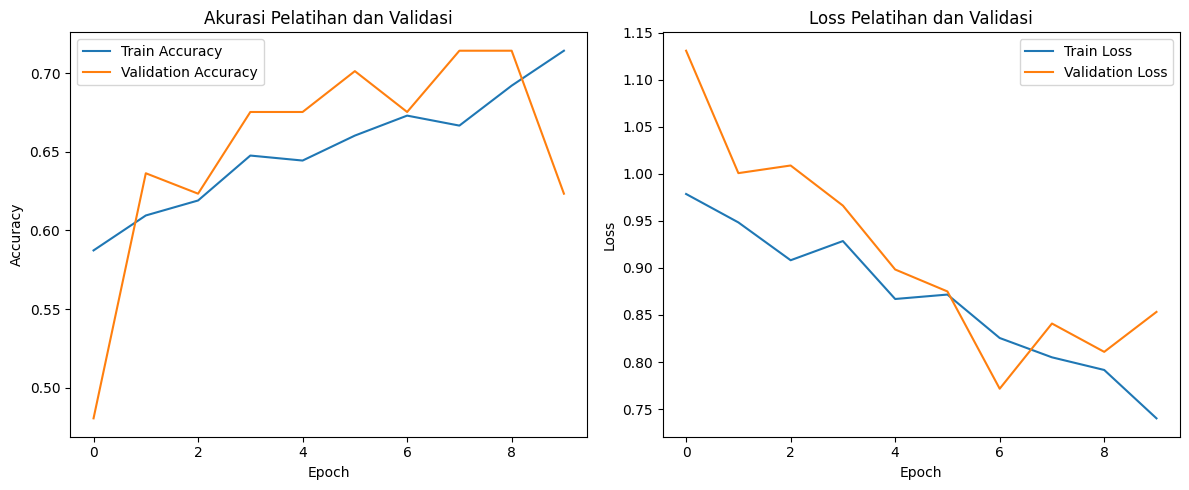

In [27]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_aug.history['accuracy'], label='Train Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Pelatihan dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_aug.history['loss'], label='Train Loss')
plt.plot(history_aug.history['val_loss'], label='Validation Loss')
plt.title('Loss Pelatihan dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step


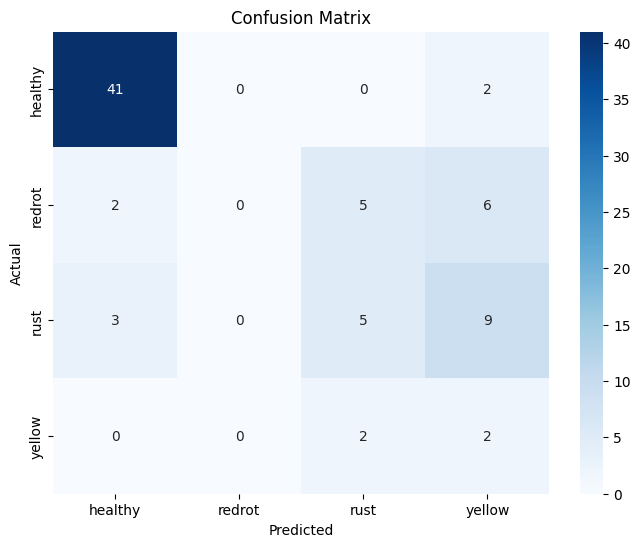

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
Y_pred = model.predict(val_data)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(val_data.classes, y_pred)
class_names = list(val_data.class_indices.keys())

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [29]:
print(classification_report(val_data.classes, y_pred, target_names=class_names))


              precision    recall  f1-score   support

     healthy       0.89      0.95      0.92        43
      redrot       0.00      0.00      0.00        13
        rust       0.42      0.29      0.34        17
      yellow       0.11      0.50      0.17         4

    accuracy                           0.62        77
   macro avg       0.35      0.44      0.36        77
weighted avg       0.60      0.62      0.60        77



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Fine tuning

In [30]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load pre-trained MobileNetV2 tanpa top layer
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Bekukan layer awal (untuk awal fine-tuning)

# Tambahkan classifier
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [31]:
history = model.fit(train_data, epochs=10, validation_data=val_data)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 101s 6s/step - accuracy: 0.4383 - loss: 1.4062 - val_accuracy: 0.5714 - val_loss: 0.9797
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.5457 - loss: 1.1125 - val_accuracy: 0.6753 - val_loss: 0.9583
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.5821 - loss: 1.0555 - val_accuracy: 0.6883 - val_loss: 0.9327
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.6511 - loss: 0.8820 - val_accuracy: 0.7013 - val_loss: 0.9335
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.6753 - loss: 0.8105 - val_accuracy: 0.7013 - val_loss: 0.9033
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.7292 - loss: 0.7198 - val_accuracy: 0.6623 - val_loss: 0.8925
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.7316 - loss: 0.7019 - val_accuracy: 0.5974 - val_loss: 0.9619
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.7741 - loss: 0.6564 - val_accuracy: 0.6364 - val_loss

In [32]:
# Buka beberapa layer terakhir dari base_model
base_model.trainable = True

# Hanya fine-tune layer tertentu (misal: 100 ke atas)
for layer in base_model.layers[:100]:
    layer.trainable = False

# Kompilasi ulang dengan learning rate kecil
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune
fine_tune_history = model.fit(train_data, epochs=10, validation_data=val_data)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 89s 7s/step - accuracy: 0.6610 - loss: 0.9035 - val_accuracy: 0.6623 - val_loss: 0.8028
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 67s 6s/step - accuracy: 0.6441 - loss: 0.8477 - val_accuracy: 0.7143 - val_loss: 0.7458
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 60s 6s/step - accuracy: 0.7907 - loss: 0.6740 - val_accuracy: 0.7143 - val_loss: 0.7045
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.7680 - loss: 0.7120 - val_accuracy: 0.7532 - val_loss: 0.6727
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 83s 6s/step - accuracy: 0.7799 - loss: 0.6350 - val_accuracy: 0.7532 - val_loss: 0.6482
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 83s 6s/step - accuracy: 0.8155 - loss: 0.5867 - val_accuracy: 0.7532 - val_loss: 0.6299
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.8300 - loss: 0.5240 - val_accuracy: 0.7662 - val_loss: 0.6123
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 60s 6s/step - accuracy: 0.8630 - loss: 0.4623 - val_accuracy: 0.7532 - val_loss:

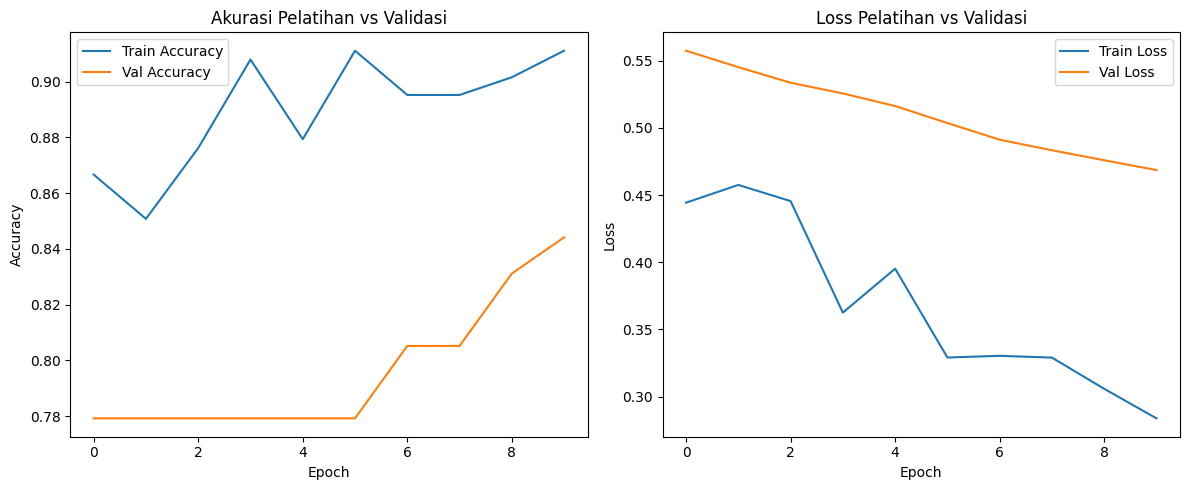

In [35]:
plt.figure(figsize=(12, 5))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history_aug.history['accuracy'], label='Train Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Val Accuracy')
plt.title('Akurasi Pelatihan vs Validasi')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_aug.history['loss'], label='Train Loss')
plt.plot(history_aug.history['val_loss'], label='Val Loss')
plt.title('Loss Pelatihan vs Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step


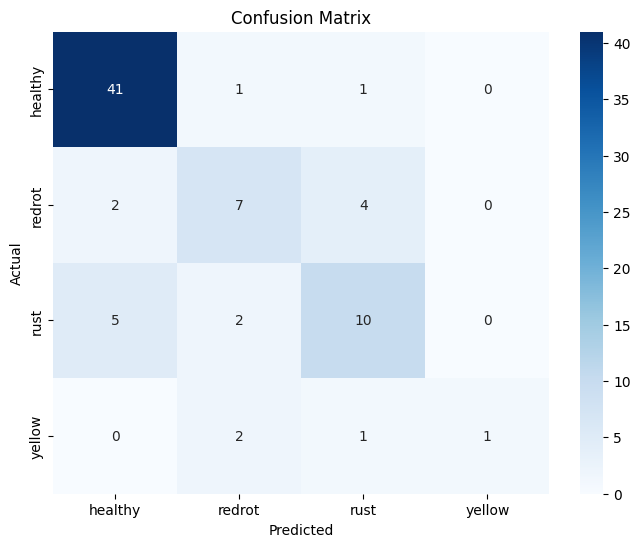

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
Y_pred = model.predict(val_data)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(val_data.classes, y_pred)
class_names = list(val_data.class_indices.keys())

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Augmentasi Fine tuning

In [34]:
history_aug = model.fit(train_data, epochs=10, validation_data=val_data)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 68s 7s/step - accuracy: 0.8696 - loss: 0.4346 - val_accuracy: 0.7792 - val_loss: 0.5575
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.8622 - loss: 0.4506 - val_accuracy: 0.7792 - val_loss: 0.5452
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.8787 - loss: 0.4578 - val_accuracy: 0.7792 - val_loss: 0.5336
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.9084 - loss: 0.3633 - val_accuracy: 0.7792 - val_loss: 0.5256
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 60s 6s/step - accuracy: 0.9076 - loss: 0.3758 - val_accuracy: 0.7792 - val_loss: 0.5163
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.9208 - loss: 0.3191 - val_accuracy: 0.7792 - val_loss: 0.5036
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.8697 - loss: 0.3507 - val_accuracy: 0.8052 - val_loss: 0.4913
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.8868 - loss: 0.3276 - val_accuracy: 0.8052 - val_loss:

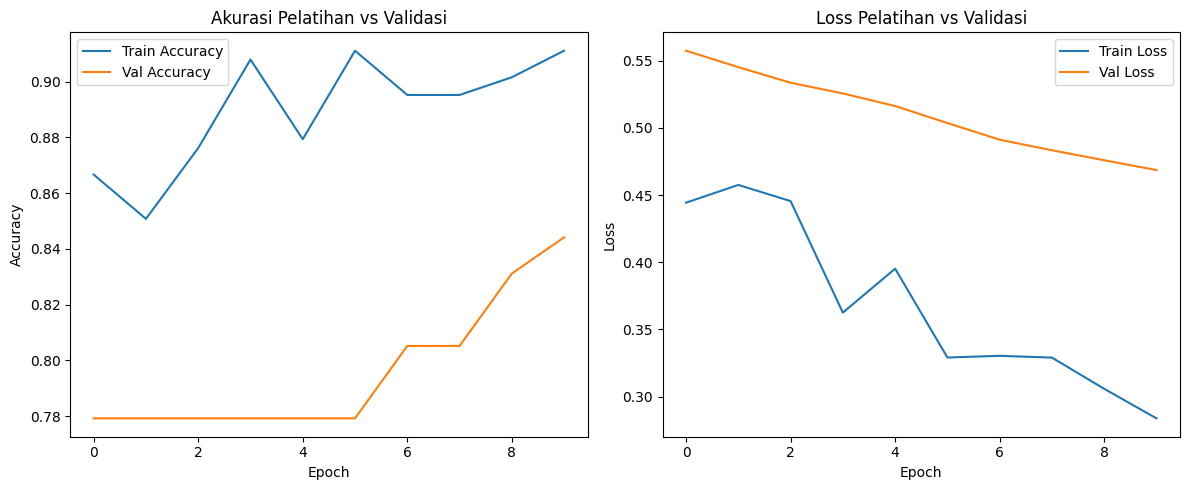

In [40]:
plt.figure(figsize=(12, 5))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history_aug.history['accuracy'], label='Train Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Val Accuracy')
plt.title('Akurasi Pelatihan vs Validasi')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_aug.history['loss'], label='Train Loss')
plt.plot(history_aug.history['val_loss'], label='Val Loss')
plt.title('Loss Pelatihan vs Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


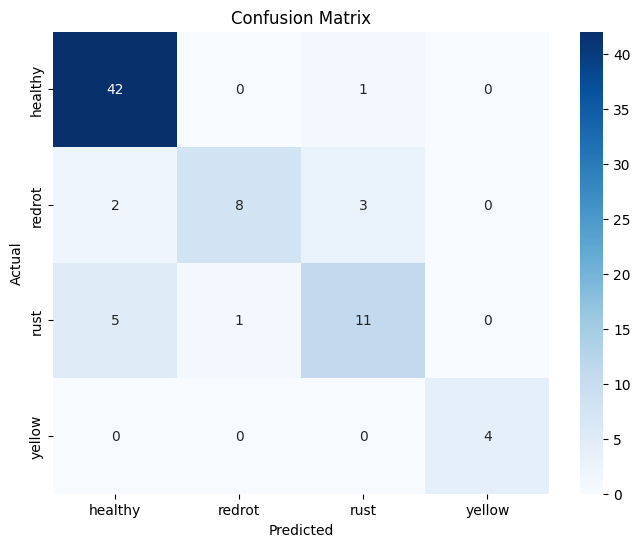

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
Y_pred = model.predict(val_data)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(val_data.classes, y_pred)
class_names = list(val_data.class_indices.keys())

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
